<a href="https://colab.research.google.com/github/jeonghyunwoo/pub_data/blob/master/rss_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) feedparser : 뉴스링크 수집

In [0]:
import feedparser

In [0]:
# cnn money section
rss = feedparser.parse('http://rss.cnn.com/rss/money_news_international.rss')

In [0]:
links = [entry['link'] for entry in rss['entries']]

### 2) newspaper: 뉴스본문 수집

In [0]:
import newspaper

In [11]:
%%time
news_text = ''
for link in links:
  article = newspaper.Article(link)
  article.download()
  article.parse()
  news_text += article.text

CPU times: user 2.11 s, sys: 39.6 ms, total: 2.15 s
Wall time: 7.1 s


In [13]:
news_text[:100]

'Mexico is ready to hit the U.S. where it hurts: Corn.\n\nMexico is one of the top buyers of American c'

### 3) tokenize

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [0]:
tokenizer = nltk.TreebankWordTokenizer()

In [0]:
stop_words = set(stopwords.words('english'))
stop_words = [w for w in stop_words]
addlst = ["''",",","'s","The","``",":","--",")","()"]
for a in addlst:
    stop_words.append(a)

In [0]:
token1 = [w for w in tokenizer.tokenize(news_text) if w not in stop_words if len(w)>1]

### 4) Counter : 단어 개수를 세기

In [0]:
from collections import Counter
count = Counter(token1)
tags = count.most_common(40)

### 5) wordcloud

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

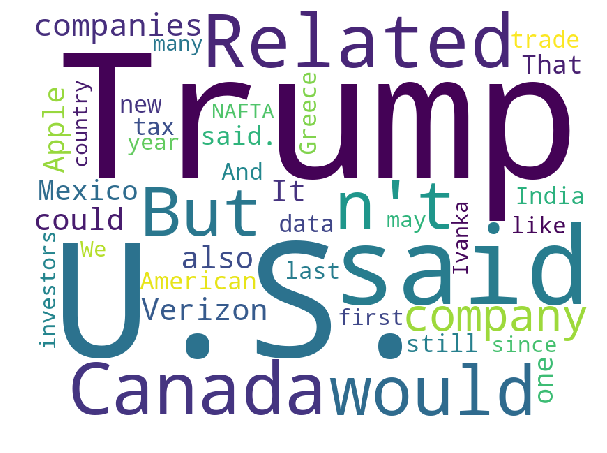

In [32]:
wc = WordCloud(background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

### (1)~(5) 함수로 만들기 

In [0]:
%matplotlib inline
import feedparser
import newspaper
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_wordcloud_from_rss(rss_link , wordn = 40):
  rss = feedparser.parse(rss_link)
  links = [entry['link'] for entry in rss['entries']]
  
  news_text = ''
  for link in links:
    article = newspaper.Article(link)
    article.download()
    article.parse()
    news_text += article.text
   
  tokenizer = nltk.TreebankWordTokenizer()
  
  stop_words = set(stopwords.words('english'))
  stop_words = [w for w in stop_words]
  addlst = ["''",",","'s","The","``",":","--",")","()"]
  for a in addlst:
      stop_words.append(a)
  
  token = [w for w in tokenizer.tokenize(news_text) if w not in stop_words if len(w)>1]
  
  count = Counter(token)
  tags = count.most_common(wordn)
  
  wc = WordCloud(background_color='white', width=800, height=600)
  cloud = wc.generate_from_frequencies(dict(tags))
  plt.figure(figsize=(10,8))
  plt.axis('off')
  plt.imshow(cloud)

CPU times: user 3.31 s, sys: 80.8 ms, total: 3.39 s
Wall time: 4.83 s


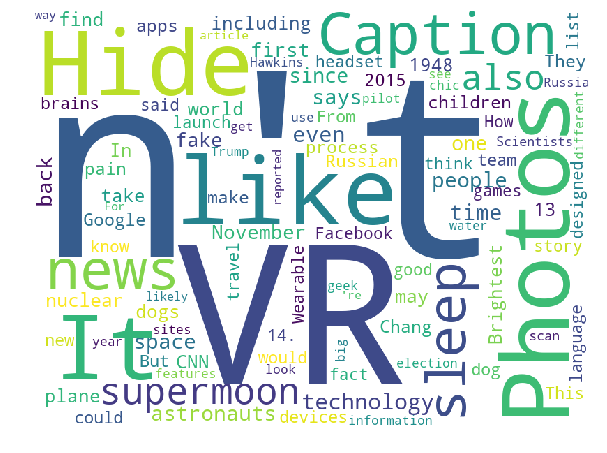

In [37]:
%%time
rss_link = 'http://rss.cnn.com/rss/edition_technology.rss'
draw_wordcloud_from_rss(rss_link, 100)

연구과제  
>**NER을 추가한 tokenize**  
>**Doc2Vec**  
>**신문사간 섹션별 비교(경제,정치,사회 등)**